## Poissson Autoregression model fitting

This notebook contains the fitting of the Poisson Autorregression to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [5]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from PoissonAutoregression.PoissonAutoregression import MultivariatePoissonAutorregresion
from DataSimulation.utils import plot_fit

In [6]:
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,2.0,173.0,143.0,11.0,2.0,937.0,81.0,52.0,27.0,20.0
1,1.0,267.0,104.0,3.0,2.0,43.0,36.0,7.0,23.0,10.0
2,5.0,102.0,73.0,12.0,1.0,714.0,35.0,44.0,29.0,3.0
3,11.0,115.0,100.0,5.0,0.0,2662.0,15.0,38.0,22.0,10.0
4,0.0,73.0,137.0,9.0,0.0,1063.0,73.0,77.0,29.0,5.0


In [7]:
test_size = 4*24
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(904, 10)
(96, 10)


In [8]:
multi_ar_p = MultivariatePoissonAutorregresion(max_p=24,max_q=24)
multi_ar_p.fit(train_data, verbose=True)

Fitting model 0/9
Model fited with p = 1 and q = 1 returns a cv_score of 13.75695420656022
Model fited with p = 1 and q = 2 returns a cv_score of 13.75421923126568
Model fited with p = 1 and q = 3 returns a cv_score of 13.748210953824124
Model fited with p = 1 and q = 4 returns a cv_score of 13.73076925925497
Model fited with p = 1 and q = 5 returns a cv_score of 13.758331289405533
Model fited with p = 1 and q = 6 returns a cv_score of 13.75958920633877
Model fited with p = 1 and q = 7 returns a cv_score of 13.757310129581878
Model fited with p = 1 and q = 8 returns a cv_score of 13.764004423062847
Model fited with p = 1 and q = 9 returns a cv_score of 13.76632843660949
Model fited with p = 1 and q = 10 returns a cv_score of 13.767110563158004
Model fited with p = 1 and q = 11 returns a cv_score of 13.77627743665722
Model fited with p = 1 and q = 12 returns a cv_score of 13.797413818917999
Model fited with p = 1 and q = 13 returns a cv_score of 13.771151381065973
Model fited with p = 1

In [9]:
fitted_values = multi_ar_p.fitted_values

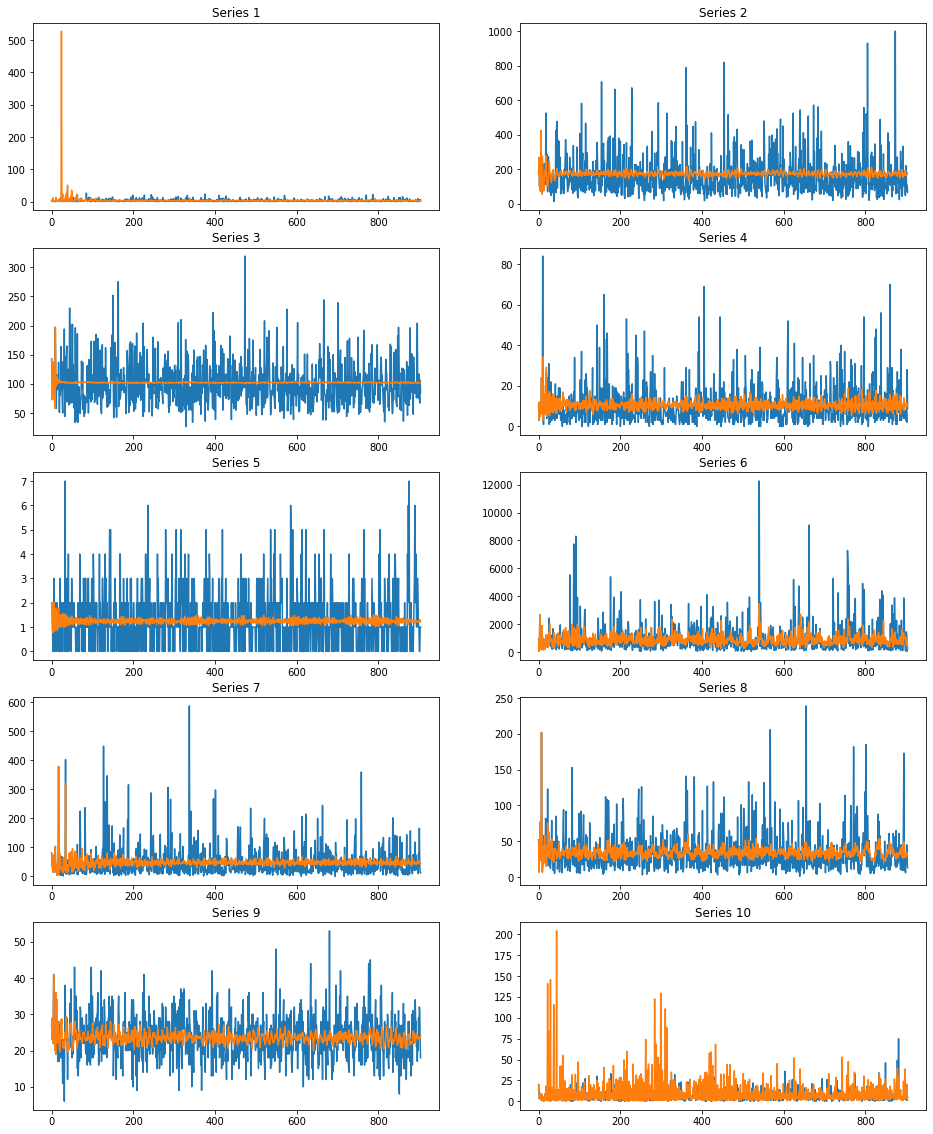

In [10]:
plot_fit(train_data, fitted_values, cols=2)

In [7]:
with open("poisson_autoregression.pkl", "wb") as file:
    pickle.dump(multi_ar_p, file)